<a href="https://colab.research.google.com/github/ItSam77/DataAnalyze/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Samuel Nardus Hamonangan Sinaga
- **Email:** samuelsinaga53@gmail.com
- **ID Dicoding:** 3669248


## Menentukan Pertanyaan Bisnis

- Pada hari apakah perentalan sepeda yang paling sedikit dan yang paling banyak?
- Bagaimana suhu memengaruhi jumlah penyewaan sepeda secara keseluruhan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
hourdf = pd.read_csv("hour.csv")
hourdf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
daydf = pd.read_csv("day.csv")
daydf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

**INFORMASI TABEL DAYDF**

In [5]:
daydf.info() ##Informasi datatype pada masing2 column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print(daydf.isna().sum()) ##Mengecek apakah ada missing value pada daydf
dups = daydf.duplicated().sum() ##Mengecek apakah ada duplicate value pada daydf
print(f"\nJumlah duplikasi = {dups}")##Mengprint duplicate value pada daydf

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi = 0


In [7]:
daydf.describe() ##Menampilkan deskriptif statistik pada daydf

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**INFORMASI TABEL HOURDF**

In [8]:
hourdf.info() ##Informasi datatype pada masing2 column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print(hourdf.isna().sum()) ##Mengecek apakah ada missing value pada hourdf
dups1 = hourdf.duplicated().sum() ##Mengecek apakah ada duplicate value pada hourdf
print(f"\nJumlah duplikasi = {dups1}")##Mengprint duplicate value pada hourdf

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi = 0


In [10]:
hourdf.describe() ##Menampilkan deskriptif statistik pada hourdf

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada variabel hourdf dan daydf, datatype pada column dtdate merupakan object. Yang seharusnya datatype pada column tersebut merupakan datetime.
- Pada variabel hourdf dan daydf juga tidak ada duplicate maupun missing value. Jadi tidak diperlukan cleaning pada missing value atau duplicate.

### Cleaning Data

In [11]:
datetime_columns = ["dteday"] ## Memilih datatype column yang ingin dirubah
for col in datetime_columns:
  daydf[col] = pd.to_datetime(daydf[col]) ## Mengubah Datatype "dteday" pada daydf
  hourdf[col] = pd.to_datetime(hourdf[col]) ## Mengubah Datatype "dteday" pada hourdf

In [12]:
daydf.info() ## Mengecek kembali datatype pada daydf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hourdf.info() ## Mengecek kembali datatype pada hourdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Telah diubah datatype pada column dteday pada kedua variabel(daydf dan hourdf) yang sebelumnya object menjadi datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore daydf

In [14]:
daydf.sample(5) ##Menampilkan 5 baris acak pada daydf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
114,115,2011-04-25,2,0,4,0,1,1,1,0.606667,0.574500,0.776667,0.185333,773,3300,4073
304,305,2011-11-01,4,0,11,0,2,1,1,0.400833,0.397088,0.683750,0.135571,410,3658,4068
179,180,2011-06-29,3,0,6,0,3,1,1,0.728333,0.654688,0.497917,0.261821,848,4377,5225
388,389,2012-01-24,1,1,1,0,2,1,1,0.342500,0.349108,0.835833,0.123767,439,3900,4339
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498


In [15]:
daydf.describe() ##Menampilkan deskriptif statistik pada daydf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
daydf.groupby(by="mnth").agg({
  "temp" : "mean",
  "cnt" : ["sum","min","max"]
}) ## Membuat Perbandingan temp(mean),cnt(sum,min,max) terhadap setiap bulan


temp     cnt            
          mean     sum   min   max
mnth                              
1     0.236444  134933   431  4521
2     0.299226  151352  1005  5062
3     0.390539  228920   605  8362
4     0.469999  269094   795  7460
5     0.594798  331686  2633  8294
6     0.684097  346342  3767  8120
7     0.755470  344948  3285  8173
8     0.708582  351194  1115  7865
9     0.616485  345991  1842  8714
10    0.485012  322352    22  8156
11    0.369220  254831  1495  6852
12    0.324031  211036   441  6606

In [17]:
daydf.sort_values(by="cnt", ascending=True) ## Menampilkan urutan pada daydf dengan cnt terkecil hingga terbesar

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555


<Axes: >

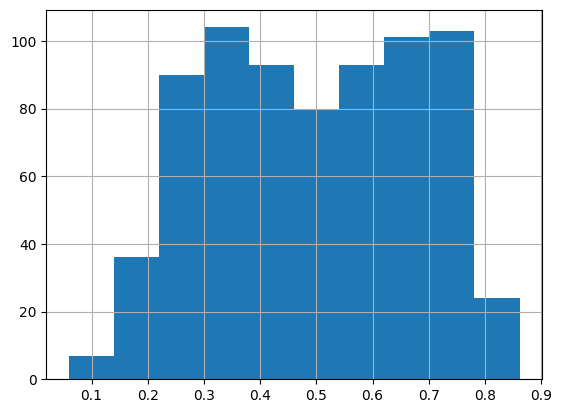

In [18]:
daydf.temp.hist() ##Menampilkan histogram pada daydf pada pemesanan yang menghendak merental berdasarkan temperature yang sedang terjadi.

### Explore hourdf

In [19]:
hourdf.sample(5) ##Menampilkan 5 baris acak pada hourdf

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11541,11542,2012-05-01,2,1,5,2,0,2,1,2,0.50,0.4848,0.72,0.0896,1,7,8
14432,14433,2012-08-29,3,1,8,13,0,3,1,1,0.74,0.6667,0.42,0.0000,68,232,300
16773,16774,2012-12-06,4,1,12,16,0,4,1,1,0.32,0.3485,0.42,0.0000,39,292,331
15587,15588,2012-10-16,4,1,10,16,0,2,1,1,0.54,0.5152,0.39,0.2836,79,367,446
4525,4526,2011-07-12,3,0,7,11,0,2,1,1,0.82,0.7727,0.52,0.1642,39,86,125


In [20]:
hourdf.describe() ##Menampilkan deskriptif statistik pada hourdf

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [21]:
hourdf.groupby(by="weekday").agg({
  "casual" : "sum",
  "registered" : "sum",
  "cnt" : "sum"
}) ## Membuat Perbandingan casual(sum),registered(sum), dan cnt(sum) terhadap harinya (0 = Minggu,...., 6 = Sabtu)

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


In [22]:
hourdf.sort_values(by="registered", ascending=False) ## Menampilkan urutan pada hourdf dengan registered dari terbanyak hingga 0

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
15780,15781,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
15108,15109,2012-09-26,4,1,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953
15756,15757,2012-10-23,4,1,10,17,0,2,1,1,0.68,0.6364,0.41,0.0000,67,871,938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.00,0.2537,3,0,3
2119,2120,2011-04-03,2,0,4,4,0,0,0,1,0.28,0.3030,0.70,0.0896,3,0,3
1161,1162,2011-02-21,1,0,2,4,1,1,0,1,0.32,0.3182,0.45,0.1642,1,0,1
6134,6135,2011-09-18,3,0,9,4,0,0,0,1,0.44,0.4394,0.77,0.2239,1,0,1


<Axes: >

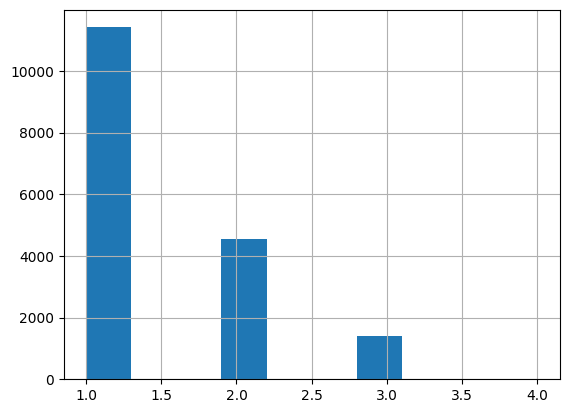

In [23]:
hourdf.weathersit.hist() ##Menampilkan histogram pada hourdf pada orang yang ingin merental berdasarkan cuaca yang sedang terjadi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apakah perentalan sepeda yang paling sedikit dan yang paling banyak?

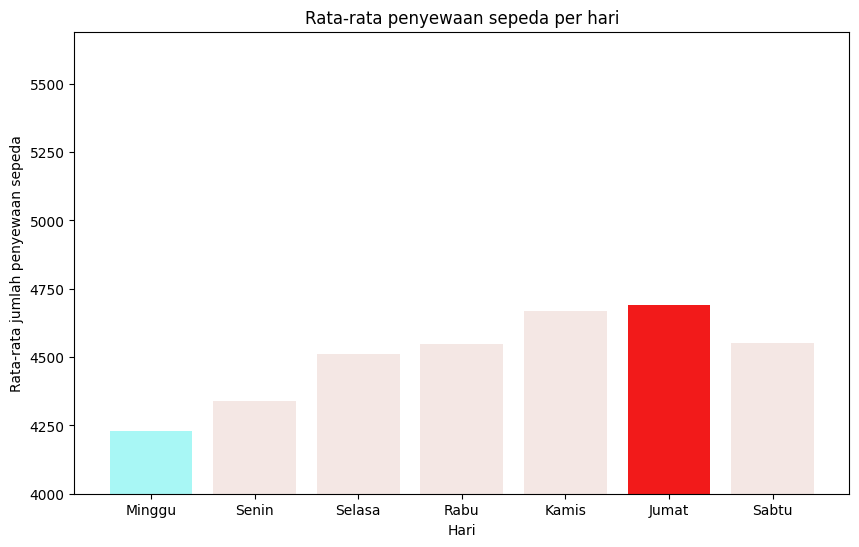

In [ ]:
rentals_by_weekday = daydf.groupby('weekday')['cnt'].mean() ## Menghitung jumlah rata2 jumlah rental untuk masing-masing hari

# Memberi warna pada plot yang akan digunakan
colors = ['#f4e7e4'] * len(rentals_by_weekday)
max_value_idx = rentals_by_weekday.idxmax()
min_value_idx = rentals_by_weekday.idxmin()

# Memberi warna khusus pada nilai terkecil / terbesar pada plot
colors[max_value_idx] = '#f21a1a'
colors[min_value_idx] = '#a8f7f5'

# Membuat barplot untuk rata2 jumlah rental untuk masing masing hari
plt.figure(figsize=(10, 6))
plt.bar(rentals_by_weekday.index, rentals_by_weekday.values, color=colors)
# Membuat y-axis start dari angka 4000
plt.ylim(4000, rentals_by_weekday.max() + 1000)

# Membuat costum y-axis dengan interval 250
plt.yticks(ticks=range(4000, int(rentals_by_weekday.max()) + 1000, 250))

# Membuat label plot dan judulnya
plt.xlabel('Hari')
plt.ylabel('Rata-rata jumlah penyewaan sepeda')
plt.title('Rata-rata penyewaan sepeda per hari')

# Menampilkan Plotnya
plt.xticks(ticks=range(7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()


In [30]:
# Menghitung jumlah perentalan berdasarkan weekday dan weathersit
rentals_by_weather_and_weekday = daydf.groupby(['weekday', 'weathersit'])['cnt'].sum().unstack()


# Mengganti indeks angka weekday menjadi nama hari
rentals_by_weather_and_weekday.index = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

# Menampilkan tabel
print(rentals_by_weather_and_weekday)


weathersit         1         2        3
Minggu      321787.0  121213.0   1027.0
Senin       296053.0  156663.0   2787.0
Selasa      309374.0  148185.0  11550.0
Rabu        341397.0  121346.0  10305.0
Kamis       336000.0  145245.0   4150.0
Jumat       319957.0  167833.0      NaN
Sabtu       333384.0  136373.0   8050.0


**Insight:**
- Paramater weathersit 1 = Cuaca Cerah, 2 = Cuaca Normal, 3 = Cuaca Mendung
- Orang melakukan rental paling sedikit pada hari minggu dan paling banyak pada hari Jumat.
- Mengapa hari jumat menjadi favorit? Karena pada hari jumat, Keadaan cuacanya bagus yang membuat orang ingin merentalkan sepeda. Lalu melihat pada hari minggu mempunyai perentalan paling sedikit. Karena merupakan hari libur bagi semua orang, jadi banyak orang tidak ingin merentalkan sepeda.

### Pertanyaan 2: Bagaimana suhu memengaruhi jumlah penyewaan sepeda secara keseluruhan?

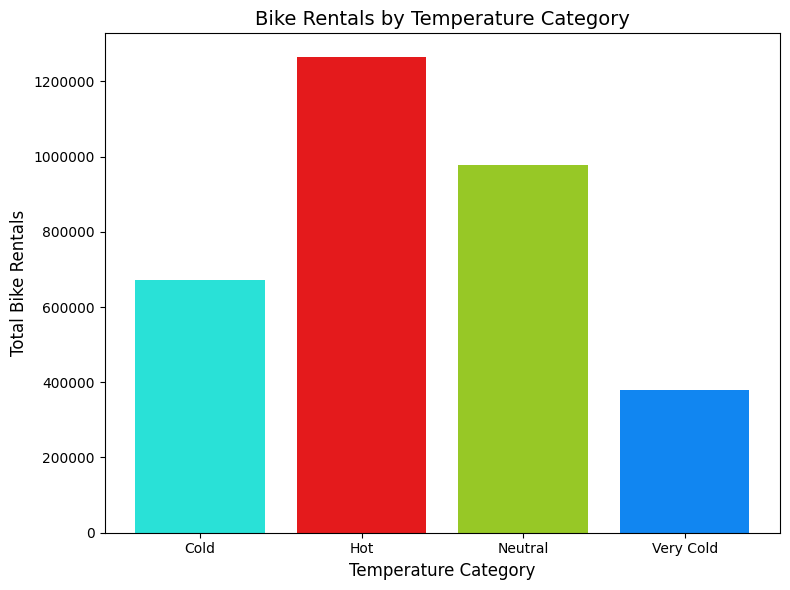

In [ ]:
# Mendefiniskan kategori temperatur pada temp.
def categorize_temp(temp):
    if temp < 0.34:
        return 'Very Cold'
    elif 0.34 <= temp < 0.5:
        return 'Cold'
    elif 0.5 <= temp < 0.66:
        return 'Neutral'
    else:
        return 'Hot'

# Apply Kategori temperatur ke dataset
hourdf['temp_category'] = hourdf['temp'].apply(categorize_temp)

# Kelompokkan berdasarkan kategori suhu dan hitung jumlah total persewaan sepeda di setiap kategori
category_rental_count = hourdf.groupby('temp_category')['cnt'].sum().reset_index()

# Membuat bar chart untuk menghitung penyewa sepeda pada kategori temperaturnya
plt.figure(figsize=(8, 6))
plt.bar(category_rental_count['temp_category'], category_rental_count['cnt'], color=['#29e1d7', '#e41a1c', '#97C826', '#1186f1'])

# Menambahkan label dan judul
plt.xlabel('Temperature Category', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.title('Bike Rentals by Temperature Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set y-axis agar bernilai integer, bukan desimal
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Menampilkan bar chart
plt.tight_layout()
plt.show()

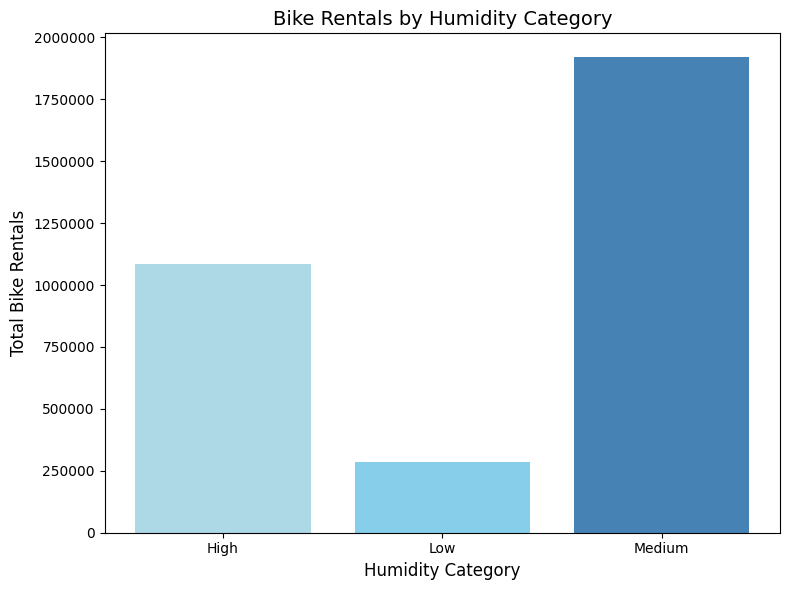

In [31]:
# Mendefinisikan kategori untuk kelembaban (hum)
def categorize_humidity(hum):
    if hum < 0.33:
        return 'Low'
    elif 0.33 <= hum < 0.66:
        return 'Medium'
    else:
        return 'High'

# Apply kategori kelembaban ke dataset
hourdf['humidity_category'] = hourdf['hum'].apply(categorize_humidity)

# Kelompokkan berdasarkan kategori kelembaban dan hitung jumlah total persewaan sepeda di setiap kategori
humidity_rental_count = hourdf.groupby('humidity_category')['cnt'].sum().reset_index()

# Membuat bar chart untuk menghitung penyewa sepeda berdasarkan kategori kelembaban
plt.figure(figsize=(8, 6))
plt.bar(humidity_rental_count['humidity_category'], humidity_rental_count['cnt'], color=['#ADD8E6', '#87CEEB', '#4682B4'])

# Menambahkan label dan judul
plt.xlabel('Humidity Category', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.title('Bike Rentals by Humidity Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set y-axis agar bernilai integer, bukan desimal
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Menampilkan bar chart
plt.tight_layout()
plt.show()

**Insight:**
- Paramater Kategori Temperatur -> Very Cold = kurang dari 13.94 C, Cold = Kurang dari 20.5 C dan Lebih dari sama dengan 13.94 C, Neutral = Kurang dari 27.06 C dan Lebih dari sama dengan 20.5 C, Hot = Lebih dari sama dengan 27.06 C
- Pada kategori Temperatur Hot yang paling diminati orang untuk menyewakan sepeda, dan pada kategori very cold paling sedikit diminati orang untuk menyewa sepeda. Karena Pada cuaca dalam suhu27.06 derajat celcius keatas orang lebih suka merentalkan sepeda kebanding pada cuaca dibawah suhu 13.94 derajat celcius
- Parameter Kategori Kelembapan -> Low = kurang dari 0.33, Medium = Kurang dari 0.66 dan Lebih dari sama dengan 0.33, dan High = Lebih dari sama dengan 0.66
- Pada kategori kelembapan, mayoritas orang memesan di kelembapan medium. Mengapa di medium? karena orang lebih suka merentalkan sepeda disaat kelembapan udara tidak terlalu tinggi maupun rendah.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 = Berdasarkan barplotnya, dapat dilihat bahwa pada hari minggu memiliki perentalan sepeda yang paling sedikit, dan pada hari jumat memiliki perentalan sepeda yang paling banyak diantara hari yang lain.
- Conclution pertanyaan 2 = Berdasarkan analisis data penyewaan sepeda yang dikategorikan menurut suhu, ada korelasi yang signifikan antara suhu dan jumlah penyewaan sepeda.Suhu yang tinggi seperti Neutral dan Hot mempunyai tingkat penyewaan lebih tinggi , kalau dibandingkan dengan suhu yang rendah seperti cold dan Very cold mempunayi tingkat penyewaan yang lebih sedikit. Yang bearti orang cenderung menyewa sepeda pada suhu yang relatif hangat dengan peningkatkan penyewaan sekitar 30% dari kategori lainnya.